Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

Eigenvector centrality of node a: 0.51807347662071
Eigenvector centrality of node b: 0.21182192277183212
Eigenvector centrality of node c: 0.5986761070959697
Eigenvector centrality of node d: 0.4566010978754134
Eigenvector centrality of node e: 0.24477918831750853
Eigenvector centrality of node f: 0.24477918831750853


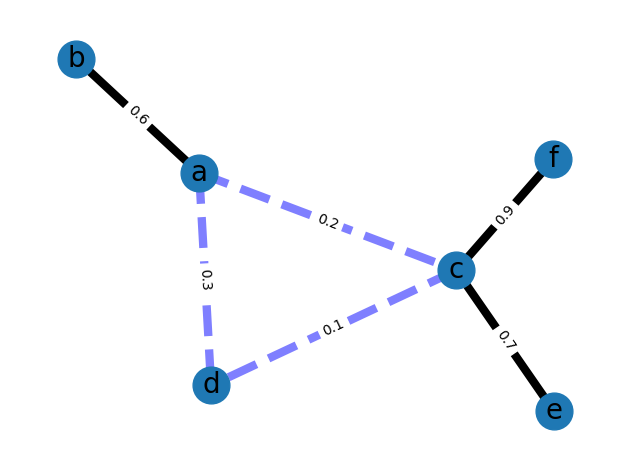

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

eigenvector_centrality = nx.eigenvector_centrality(G)

# Print Eigenvector Centrality values for each node
for node, centrality in eigenvector_centrality.items():
    print(f"Eigenvector centrality of node {node}: {centrality}")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

## Hyptohesis

- In the context of a Dota 2 community network graph, nodes representing professional players, casters, panelists, and analysts will exhibit higher eigenvector centrality compared to other nodes.

Most central nodes: [Redditor(name='Kharate'), Redditor(name='zllzlla'), Redditor(name='deathofme1'), Redditor(name='7UpAT'), Redditor(name='goodwarrior12345')]


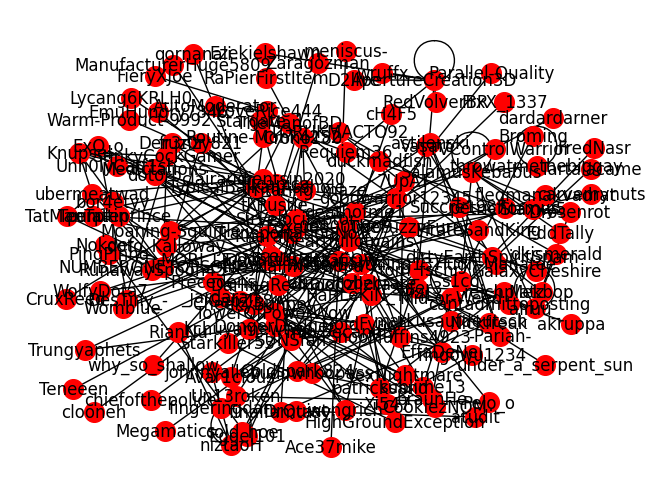

In [17]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id="nZvHPzcevRkcIs1CqWJjQA",
                        client_secret="iG9pljhMBAmX9FWSxDC9RRUJnA5Tjw",
                        user_agent="Content_Recipe_3294")

subreddit = reddit.subreddit('DotA2')
commentCount = 10
g = nx.Graph()

def recursive_node_adder(g, comment, parent_author):
    '''Recursively process comments and add them to the graph'''
    
    # Check if we have the node already in our graph
    if comment.author is not None:
        if comment.author not in g.nodes:
            g.add_node(comment.author)
        # Create an edge between this comment author and the parent author
        g.add_edge(comment.author, parent_author)
        # Iterate through the comments
        for reply in comment.replies.list():
            if isinstance(reply, praw.models.MoreComments):
                continue
            # Recursively process this reply
            recursive_node_adder(g, reply, comment.author)

for post in subreddit.hot(limit=20):
    # Check if we have the node already in our graph
    if post.author not in g.nodes:
        g.add_node(post.author)
    post.comment_limit = commentCount
    # Get the top few comments
    for comment in post.comments.list():
        # Skip MoreComment objects, which don't have authors
        if isinstance(comment, praw.models.MoreComments):
            continue
        # Recursively process this reply
        recursive_node_adder(g, comment, post.author)

eigenvector_centrality = nx.eigenvector_centrality(g)
central_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
print("Most central nodes:", central_nodes[:5])  # Print the top 5 central nodes

pos = nx.spring_layout(g, scale=200, iterations=5, k=0.2)
nx.draw(g, pos, node_color='red', width=1, with_labels=True, node_size=200)
plt.show()